In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Aux DataFrame

In [12]:
cons = pd.DataFrame({'colunas': df.columns,
                     'tipo': df.dtypes,
                     'missing': df.isna().sum(),
                     'size': df.shape[0],
                     'unique': df.nunique()
})

cons['missing_pct'] = round(cons['missing'] / cons['size'], 2)
cons

,colunas,tipo,missing,size,unique,missing_pct
Id,Id,int64,0,1460,1460,0.00
MSSubClass,MSSubClass,int64,0,1460,15,0.00
MSZoning,MSZoning,object,0,1460,5,0.00
LotFrontage,LotFrontage,float64,259,1460,110,0.18
LotArea,LotArea,int64,0,1460,1073,0.00
...,...,...,...,...,...,...
MoSold,MoSold,int64,0,1460,12,0.00
YrSold,YrSold,int64,0,1460,5,0.00
SaleType,SaleType,object,0,1460,9,0.00
SaleCondition,SaleCondition,object,0,1460,6,0.00


### Seleção por completude

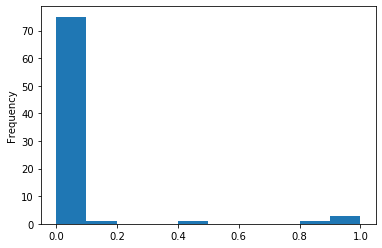

In [11]:
cons['missing_pct'].plot.hist()

In [16]:
df.dropna(axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
cons[cons['missing_pct'] == 0]['tipo'].value_counts()

int64     35
object    28
Name: tipo, dtype: int64

In [23]:
keep = list(cons[cons['missing_pct'] == 0]['colunas'])
cons['completa'] = cons['missing_pct'].apply(lambda x: 'completa' if x == 0 else 'faltante')

In [24]:
df = df[keep]
df.shape

(1460, 63)

In [26]:
numerical_features = list(cons[(cons['tipo'] != 'object') & 
                          (cons['completa'] == 'completa')]['colunas']) 
numerical_features

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Exploration

Id


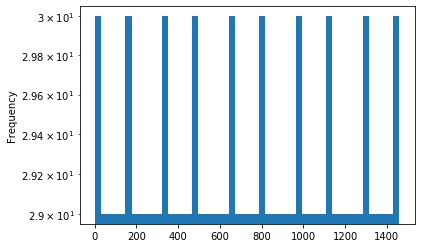

MSSubClass


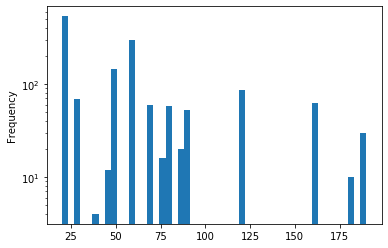

LotArea


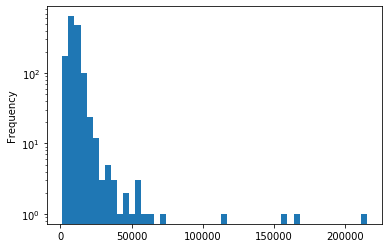

OverallQual


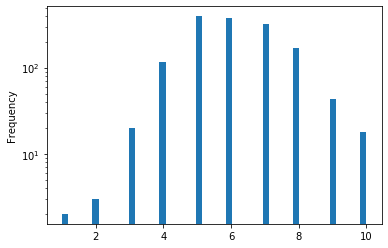

OverallCond


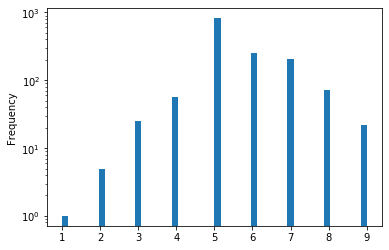

YearBuilt


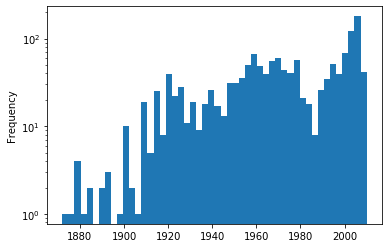

YearRemodAdd


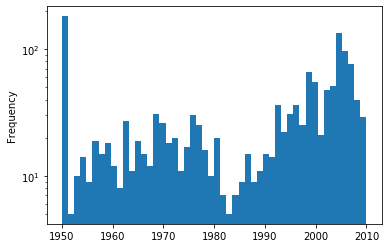

BsmtFinSF1


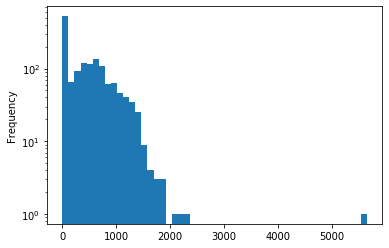

BsmtFinSF2


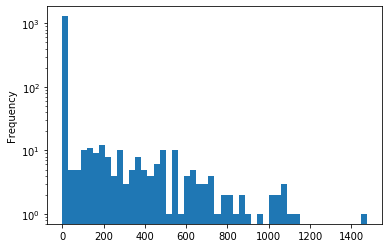

BsmtUnfSF


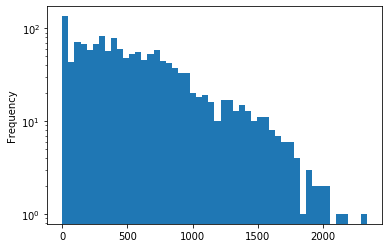

TotalBsmtSF


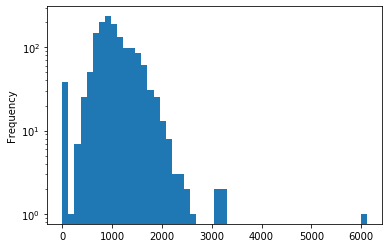

1stFlrSF


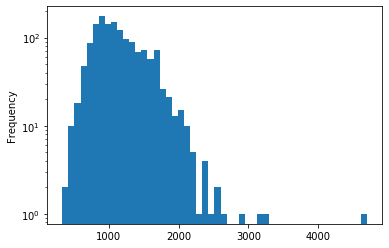

2ndFlrSF


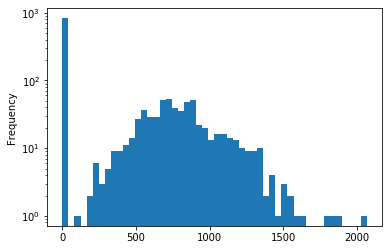

LowQualFinSF


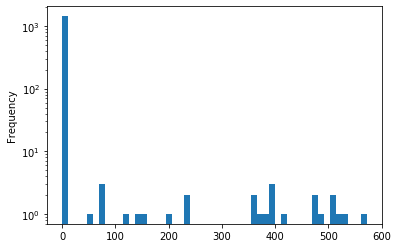

GrLivArea


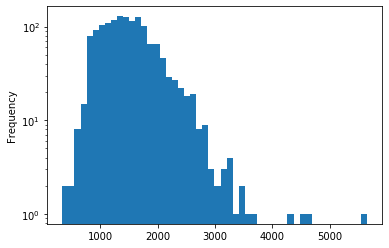

BsmtFullBath


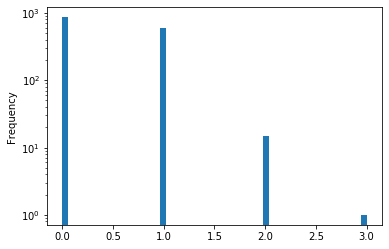

BsmtHalfBath


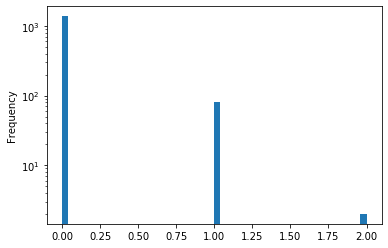

FullBath


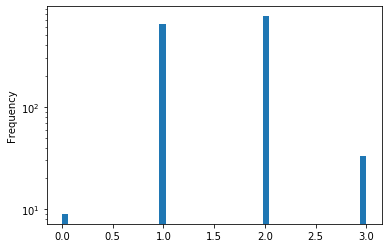

HalfBath


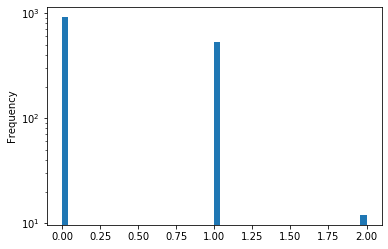

BedroomAbvGr


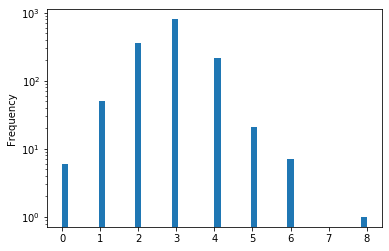

KitchenAbvGr


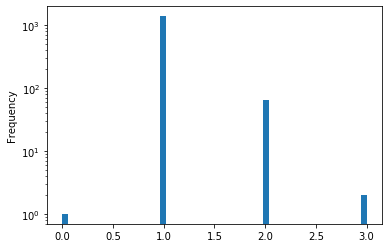

TotRmsAbvGrd


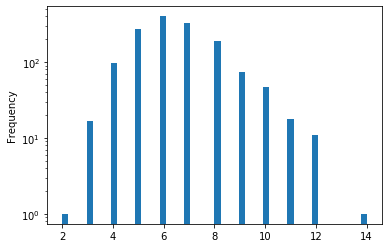

Fireplaces


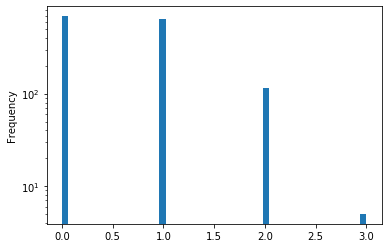

GarageCars


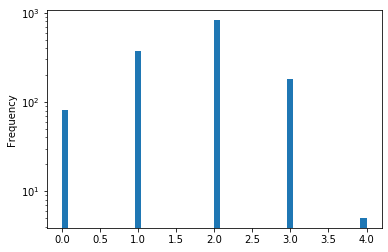

GarageArea


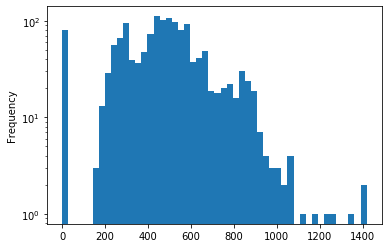

WoodDeckSF


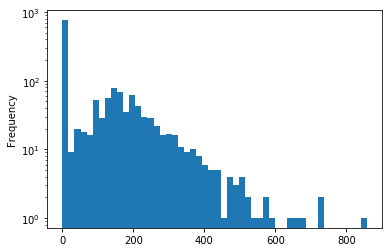

OpenPorchSF


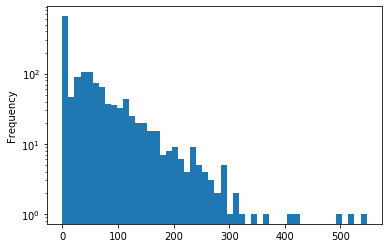

EnclosedPorch


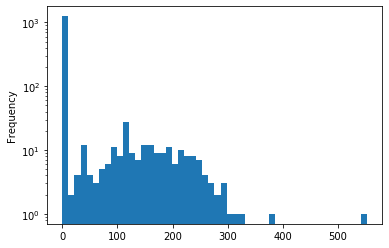

3SsnPorch


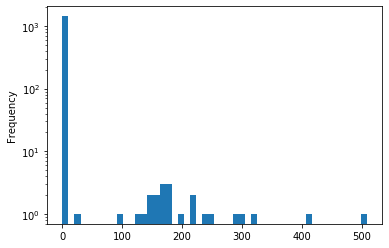

ScreenPorch


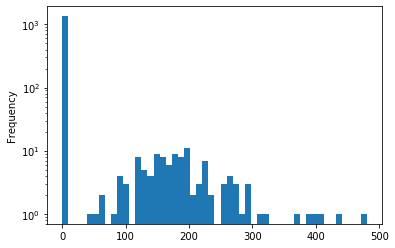

PoolArea


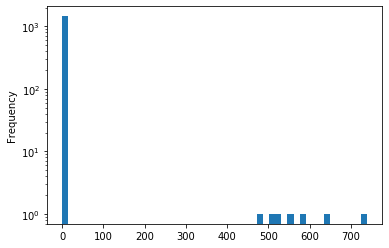

MiscVal


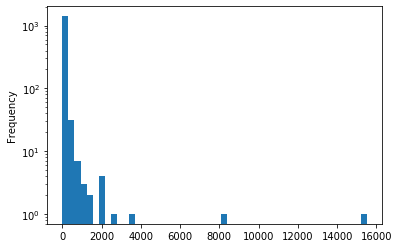

MoSold


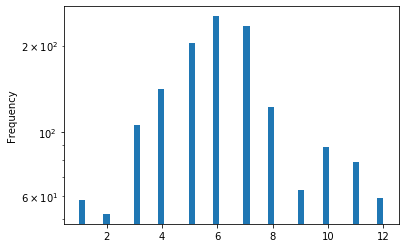

YrSold


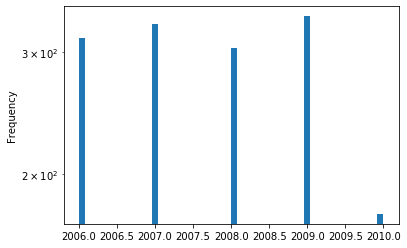

SalePrice


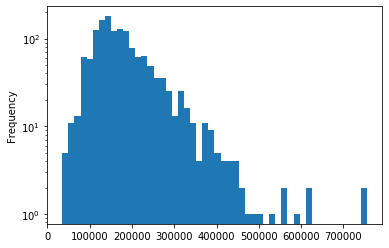

In [28]:
for feature in numerical_features:
    print(feature)
    df[feature].plot.hist(bins=50, log=True)
    plt.show()

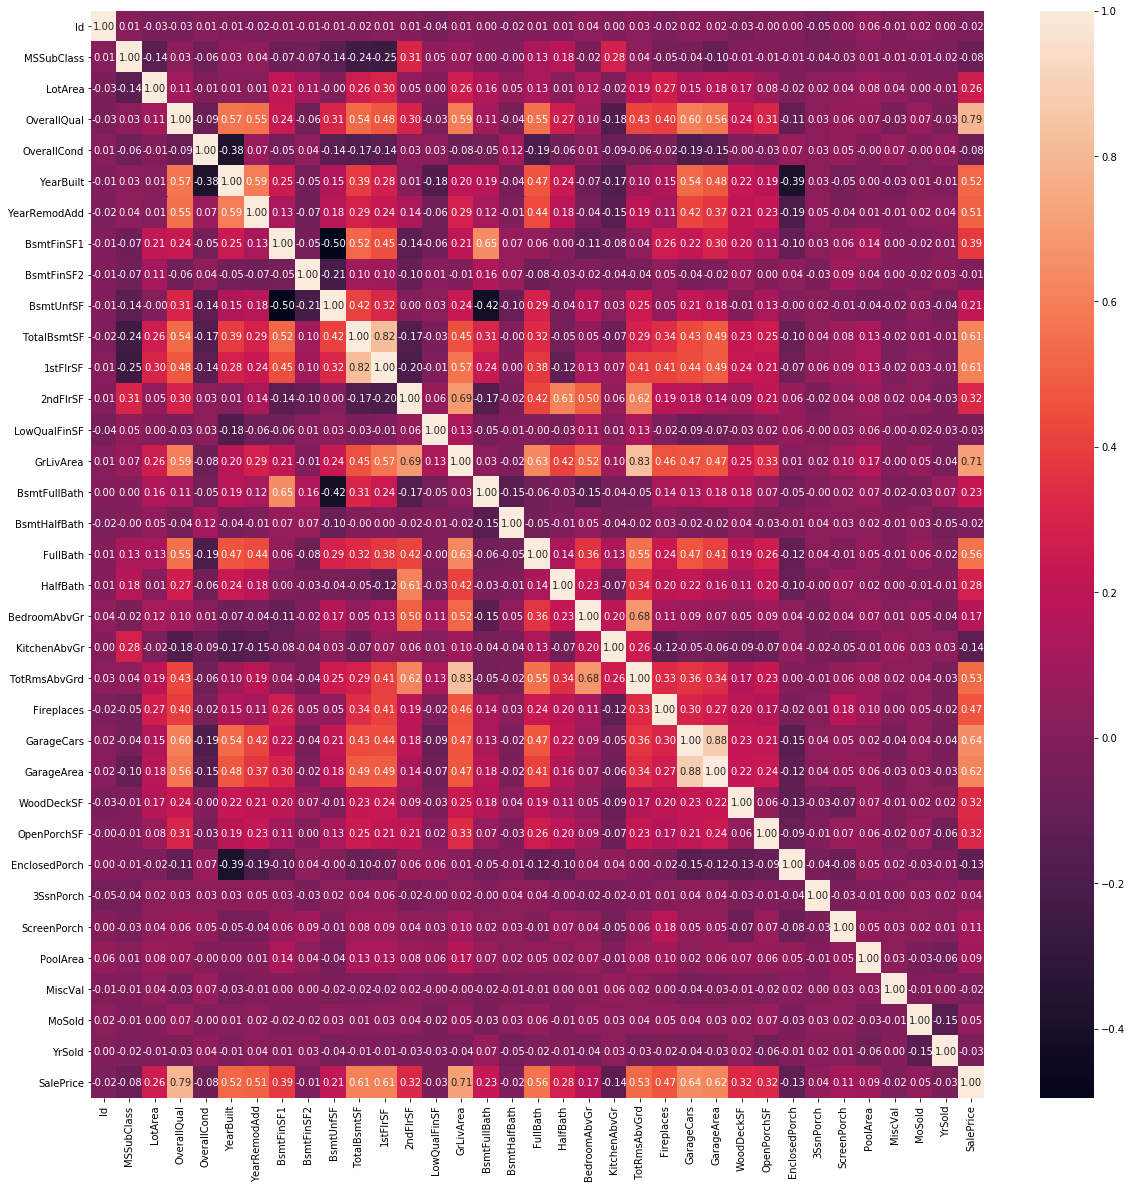

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [43]:
numerical_features.remove('Id')
df = df[numerical_features]

In [48]:
corr = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']
y_train = df['SalePrice']
X_train = df.drop('SalePrice', axis=1)

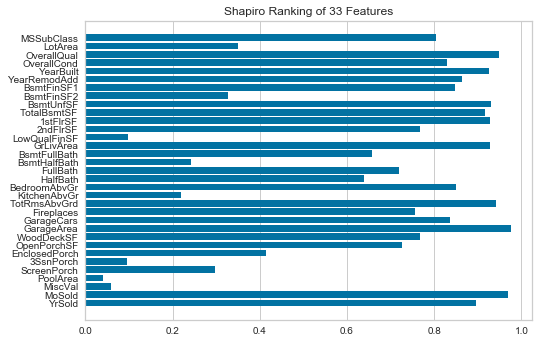

In [45]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_train, y_train)
visualizer.transform(X_train)
visualizer.show()

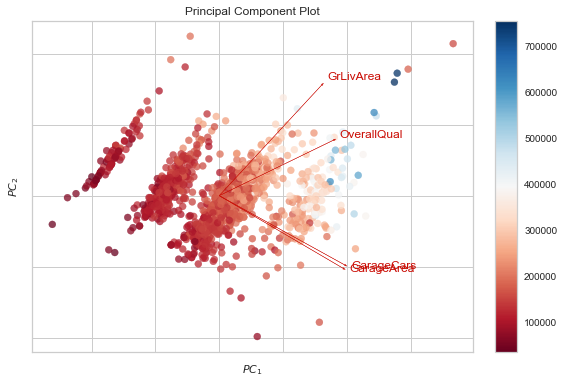

In [56]:
from yellowbrick.features import PCA

visualizer = PCA(scalce=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train[corr], y_train)
visualizer.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


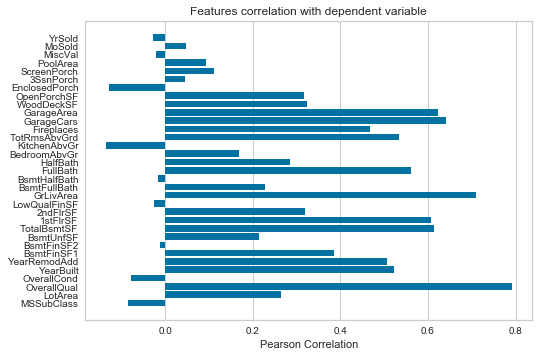

In [57]:
from yellowbrick.target import FeatureCorrelation

features = list(X_train.columns)

visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X_train, y_train)
visualizer.show()

# Model Training

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
reg = LinearRegression()

In [61]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
train_cols = X_train.columns

In [64]:
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("sample_submission.csv")

In [65]:
y_test = y_test['SalePrice']

In [66]:
X_test = X_test[train_cols].fillna(df[train_cols].mean())

In [67]:
y_pred = reg.predict(X_test[train_cols])

4647194215.337207


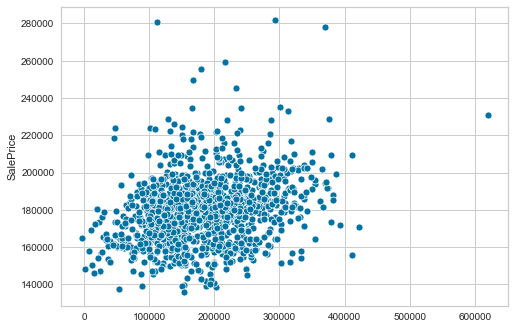

In [99]:
error_normal = mean_squared_error(y_pred, y_test)
sns.scatterplot(y_pred, y_test)
print(erro_normal)

# Feature Selection

In [75]:
from sklearn.feature_selection import RFE

In [76]:
rfe = RFE(reg)

In [77]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [81]:
pd.DataFrame({'column': X_train.columns,
              'bool': rfe.get_support(),
              'coef': reg.coef_
})

,column,bool,coef
0,MSSubClass,False,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,False,4418.794796
4,YearBuilt,False,346.653503
5,YearRemodAdd,False,137.073924
6,BsmtFinSF1,True,11.833598
7,BsmtFinSF2,True,-2.728260
8,BsmtUnfSF,True,0.787735
9,TotalBsmtSF,True,9.893072


In [82]:
X_train_import = rfe.transform(X_train)
X_test_import = rfe.transform(X_test)

In [84]:
reg.fit(X_train_import, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_pred_import = reg.predict(X_test_import)

4541848687.438569


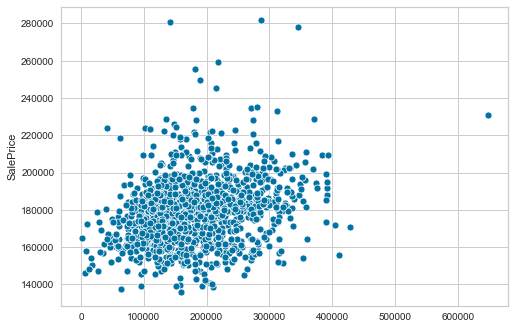

In [98]:
error_import = mean_squared_error(y_pred_import, y_test)
sns.scatterplot(y_pred_import, y_test)
print(erro_import)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


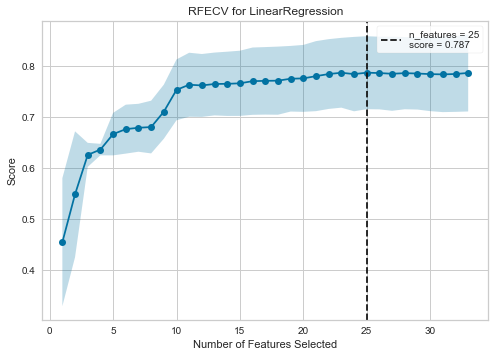

In [88]:
from yellowbrick.model_selection import RFECV

visualizer = RFECV(reg)

visualizer.fit(X_train, y_train)
visualizer.show()

# PCA


In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(0.95)

In [92]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca.explained_variance_ratio_

array([0.98511677])

In [94]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [95]:
reg.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred_pca = reg.predict(X_test_pca)

134744447.42149565


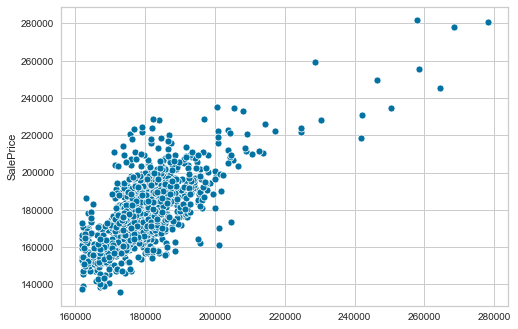

In [97]:
error_pca = mean_squared_error(y_pred_pca, y_test)
print(error_pca)
sns.scatterplot(y_pred_pca, y_test)

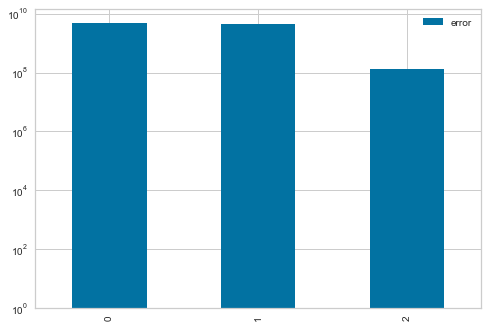

In [102]:
pd.DataFrame({'error': [error_normal, error_import, error_pca]}).plot(kind='bar', log=True)

In [103]:
import numpy as np

In [110]:
a = np.array([1, 2, 3])
b = np.array([1, -1, 0, 1])

In [112]:
np.dot(a, b.T)

ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)